In [1668]:
import matplotlib.pyplot as plt

### Load the data into the notebook

In [1669]:
from sklearn import datasets

X, y = datasets.load_diabetes(as_frame=True, return_X_y=True)
print(X)

          age       sex       bmi        bp        s1        s2        s3   
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

### Prepare the data extracting the desired column (body mass index)

In [1670]:
# Get the values of the desired column
X = X['bmi'].values
# X = X[0:,2]

# Display and reshape the extracted data
X = X.reshape(-1,1)
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

### Splitting the data into 70% and 30% of trained and test sets respectively

In [1671]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1672]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Making predictions on the test set

In [1673]:
y_pred = model.predict(X_test)


### Model's parameters

In [1674]:
# Model parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: 988.4193124893594
Intercept: 151.04202449316014


### Loss on the train and datasets

In [1675]:
from sklearn.metrics import mean_squared_error
# Calculate the mean squared error on both train and test sets
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test,y_pred)

print(f'Mean Squared Train Error: {mse_train}')
print(f'Mean Squared Test Error: {mse_test}')

Mean Squared Train Error: 3899.45479231627
Mean Squared Test Error: 3884.936720961032


### Ploting the training data, test data, and the model

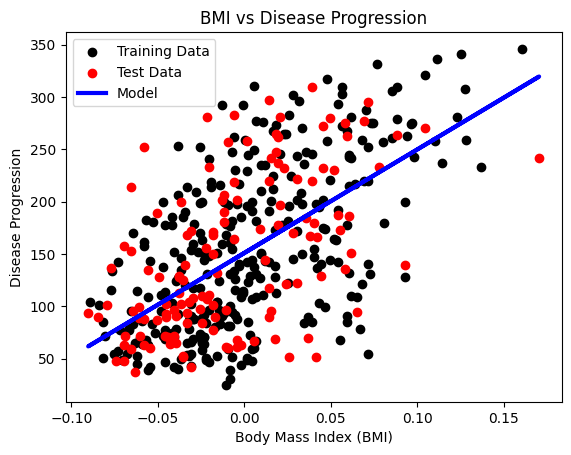

In [1676]:
plt.scatter(X_train,y_train,color='black')
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue', linewidth=3)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('BMI vs Disease Progression')
plt.legend(['Training Data','Test Data','Model'])
plt.show()

### With this approach, comparing the MSE on the train and the dataset, the the values are similar with a small difference, it suggests that the model is making accurate predictions 